In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris



In [2]:
dataset=pd.read_csv("Crop_recommendation.csv",index_col=None)

In [3]:
df=dataset

In [4]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
iris = load_iris()
df1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df1['target'] = iris.target


In [6]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
#encoding
label_enc=LabelEncoder()
df['label_encoded']=label_enc.fit_transform(df['label'])


In [9]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


In [10]:
# Print all label mappings
for index, label in enumerate(label_enc.classes_):
    print(f"{label} --> {index}")

apple --> 0
banana --> 1
blackgram --> 2
chickpea --> 3
coconut --> 4
coffee --> 5
cotton --> 6
grapes --> 7
jute --> 8
kidneybeans --> 9
lentil --> 10
maize --> 11
mango --> 12
mothbeans --> 13
mungbean --> 14
muskmelon --> 15
orange --> 16
papaya --> 17
pigeonpeas --> 18
pomegranate --> 19
rice --> 20
watermelon --> 21


In [11]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [12]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'label_encoded'],
      dtype='object')

In [13]:
independent=df[['N','P','K','rainfall']]

In [14]:
independent

,N,P,K,rainfall
0,90,42,43,202.935536
1,85,58,41,226.655537
2,60,55,44,263.964248
3,74,35,40,242.864034
4,78,42,42,262.717340
...,...,...,...,...
2195,107,34,32,177.774507
2196,99,15,27,127.924610
2197,118,33,30,173.322839
2198,117,32,34,127.175293


In [15]:
dependent=df[['label_encoded']]

In [16]:
dependent

,label_encoded
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [17]:
df.shape

(2200, 9)

In [18]:
dep=np.ravel(dependent)

In [19]:
dep

array([20, 20, 20, ...,  5,  5,  5])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dep,test_size=0.30,random_state=0)

In [21]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
from sklearn.model_selection import GridSearchCV
classifier=RandomForestClassifier(n_estimators = 3000, random_state = 42)

classifier.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=3000, random_state=42)

In [23]:
Y_pred=classifier.predict(X_test)

Accuracy: 93.03%


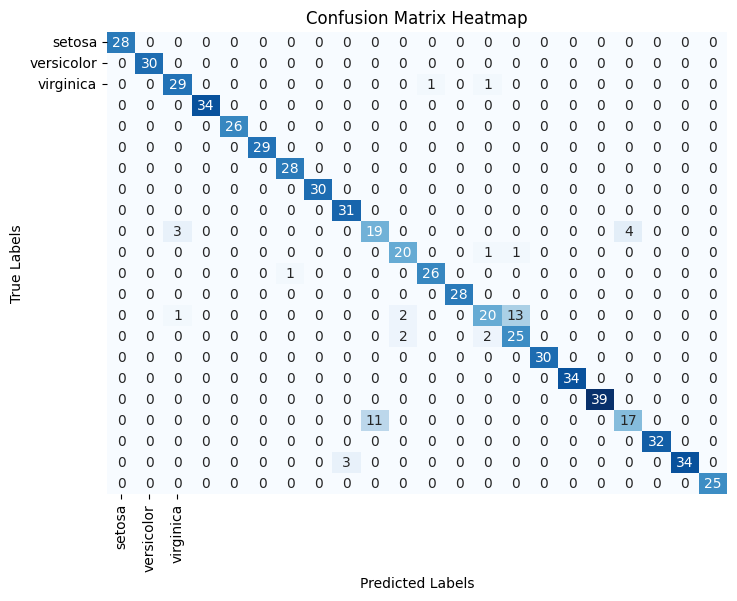

In [24]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [25]:
#metrics are used to find accuracy or error
from sklearn import metrics
print()

In [26]:
#using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(Y_test, Y_pred))

ACCURACY OF THE MODEL: 0.9303030303030303


In [27]:
import pickle

In [28]:
loaded_model=pickle.load(open("finalized_model_Forest.sav",'rb'))
result=loaded_model.predict([[117,32,34,26.272418,52.127394,6.758793,127.]])

C:\Users\Admin\anaconda3\envs\adml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [29]:
result

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [30]:
result=result.reshape(-1)

In [31]:
result

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [32]:
np.argmax(result)

4

In [34]:
decoded_label = label_enc.inverse_transform([index])
print("Predicted Crop:",decoded_label[0])


Predicted Crop: watermelon
